In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787557,999.766096
1,548.130012,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


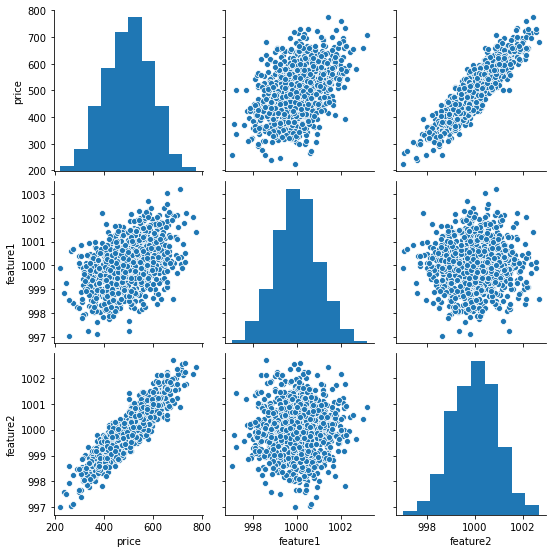

In [4]:
sns.pairplot(df)

In [5]:
c=df.corr()

In [6]:
c['price']

price       1.000000
feature1    0.444190
feature2    0.907576
Name: price, dtype: float64

In [7]:
X=df[['feature1','feature2']].values
y=df['price'].values

In [8]:
X

array([[ 999.7875575,  999.7660962],
       [ 998.8616149, 1001.042403 ],
       [1000.070267 ,  998.8440146],
       ...,
       [1001.451646 ,  998.8476055],
       [1000.771023 ,  998.5628509],
       [ 999.2322436, 1001.451407 ]])

In [78]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_train.max()

1.0

In [3]:
import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
ks.__version__

'2.3.0-tf'

In [5]:
#mnist=pd.read_csv('mnist_train.csv')

In [6]:
mnist_train=ks.datasets.fashion_mnist

In [7]:
(x_train_full,y_train_full),(x_test,y_test)=mnist_train.load_data()

In [21]:
x_train_full.shape

(60000, 28, 28)

In [22]:
x_train_full.dtype

dtype('uint8')

In [23]:
#x_train_full[:5000]

In [8]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#x_train_full[0,10],x_train[0,10]

In [10]:
class_name=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_name[y_train[0]]

'Coat'

In [12]:
model=Sequential()

In [29]:
#x_train_full[1,10].reshape(-1,1)

In [30]:
'''model.add(ks.layers.InputLayer(input_shape=[28,28]))
model.add(ks.layers.Dense(300,activation='relu'))
model.add(ks.layers.Dense(100,activation='relu'))
model.add(ks.layers.Dense(10,activation='softmax'))'''

"model.add(ks.layers.InputLayer(input_shape=[28,28]))\nmodel.add(ks.layers.Dense(300,activation='relu'))\nmodel.add(ks.layers.Dense(100,activation='relu'))\nmodel.add(ks.layers.Dense(10,activation='softmax'))"

we can also directly add list of layers when creating Sequential rather adding one by one

In [13]:
model=Sequential(
[
    (ks.layers.Flatten(input_shape=[28,28])),
    (ks.layers.Dense(300,activation='relu')),
    (ks.layers.Dense(100,activation='relu')),
    (ks.layers.Dense(10,activation='softmax'))
]
)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
#ks.utils.plot_model(model)

In [34]:
model.layers

In [15]:
hidden1=model.layers[1]

In [16]:
hidden1.name

'dense'

In [17]:
weights,biases=hidden1.get_weights()

In [18]:
weights,weights.shape

(array([[-0.06881675, -0.02954197, -0.03293597, ...,  0.04999531,
         -0.02775336, -0.06979865],
        [ 0.0694433 , -0.03555815, -0.05124595, ...,  0.06046931,
          0.00422576, -0.0658277 ],
        [-0.03491028, -0.06564265,  0.02674811, ..., -0.07062647,
          0.00408155,  0.00110266],
        ...,
        [ 0.04979892, -0.01836943, -0.03380407, ...,  0.0343876 ,
         -0.06902596,  0.07044853],
        [ 0.06381522, -0.05514864, -0.0274127 , ..., -0.05080196,
         -0.06408   ,  0.00565733],
        [-0.05925734, -0.03444535,  0.03207166, ..., -0.01887423,
         -0.00329628, -0.05604371]], dtype=float32), (784, 300))

In [19]:
biases,biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [20]:
model.compile(optimizer=ks.optimizers.SGD(learning_rate=0.3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
#cl=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
'''pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)  
plt.gca().set_ylim(0, 1)# set the vertical range to [0-1]'''

'pd.DataFrame(history.history).plot(figsize=(8,5))\nplt.grid(True)  \nplt.gca().set_ylim(0, 1)# set the vertical range to [0-1]'

In [44]:
#model.evaluate(x_test,y_test)

In [45]:
#x_new=x_test[:3]

In [46]:
#pred=model.predict(x_new)

In [47]:
#pred

In [48]:
#cl_pred=model.predict_classes(x_new)

In [49]:
#cl_pred

In [50]:
#np.array(class_name)[cl_pred]

In [75]:
from sklearn.datasets import fetch_california_housing

In [76]:
cal=fetch_california_housing()

In [77]:
cal.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [80]:
x_train_full,x_test,y_train_full,y_test=train_test_split(cal.data,cal.target)

In [81]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler=MinMaxScaler()

In [84]:
x_train=scaler.fit_transform(x_train)

In [85]:
x_test=scaler.transform(x_test)

In [86]:
x_valid=scaler.transform(x_valid)

In [87]:
model_reg=tf.keras.Sequential(
[
    ks.layers.InputLayer(input_shape=[8,]),
    ks.layers.Dense(200,activation='relu'),
    ks.layers.Dense(1)
]
)

In [88]:
model_reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_reg.layers

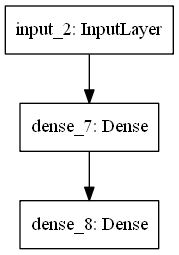

In [90]:
ks.utils.plot_model(model_reg)

In [40]:
model_reg.compile(loss='mean_squared_error',optimizer=ks.optimizers.SGD(learning_rate=0.3))

In [66]:
r=model_reg.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.9459 - val_loss: 0.6377
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6692 - val_loss: 0.5641
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6264 - val_loss: 0.5874
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5850
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5738 - val_loss: 0.6793
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.8553
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5633 - val_loss: 0.7441
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5462 - val_loss: 0.6729
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5399 - val_loss: 0.5342
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5357 - val_loss: 0.5325

In [67]:
X_new = x_test[:3]

In [68]:
p=model_reg.predict(X_new)

In [69]:
p

array([[0.81783915],
       [2.124953  ],
       [2.249751  ]], dtype=float32)

In [70]:
y_test[:3]

array([1.114, 1.146, 2.15 ])

In [71]:
input_=ks.Input(shape=[8,])
hidden1=ks.layers.Dense(30,activation='relu')(input_)
hidden2=ks.layers.Dense(30,activation='relu')(hidden1)
concat=ks.layers.Concatenate()([input_,hidden2])
output=ks.layers.Dense(1)(concat)
model=ks.Model(inputs=[input_],outputs=[output])
model.compile(loss='mean_squared_error',optimizer='sgd')

In [72]:
his=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0397 - val_loss: 0.7827
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6362 - val_loss: 0.6374
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5727 - val_loss: 0.5898
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5506 - val_loss: 0.5674
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5364 - val_loss: 0.5662
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5241 - val_loss: 0.5471
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5151 - val_loss: 0.5361
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5084 - val_loss: 0.5311
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5032 - val_loss: 0.5270
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5005 - val_loss: 0.5214

In [73]:
x_new=x_test[:3]

In [74]:
pred=model.predict(x_new)

In [75]:
pred

array([[0.9219879],
       [2.30684  ],
       [2.379754 ]], dtype=float32)

In [76]:
y_test[:3]

array([1.114, 1.146, 2.15 ])

In [91]:
input_A=ks.layers.Input(shape=[5,],name='Wide')
input_B=ks.layers.Input(shape=[6,],name='Deep')
hidden1=ks.layers.Dense(30,activation='relu')(input_B)
hidden2=ks.layers.Dense(30,activation='relu')(hidden1)
concat=ks.layers.concatenate([input_A,hidden2])
output=ks.layers.Dense(1,name='output')(concat)

In [92]:
model=ks.Model(inputs=[input_A,input_B],outputs=[output])

In [93]:
model.compile(optimizer='sgd',loss='mse')

In [94]:
x_train_a,x_train_b=x_train[:,:5],x_train[:,2:]
x_valid_a,x_valid_b=x_valid[:,:5],x_valid[:,2:]
x_test_a,x_test_b=x_test[:,:5],x_test[:,2:]

In [95]:
history=model.fit((x_train_a,x_train_b),y_train,epochs=20,validation_data=((x_valid_a,x_valid_b),y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3392 - val_loss: 1.1936
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0961 - val_loss: 1.0522
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9704 - val_loss: 0.9388
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8625 - val_loss: 0.8364
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7653 - val_loss: 0.7505
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6766 - val_loss: 0.6692
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6144 - val_loss: 0.6252
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5804 - val_loss: 0.6017
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5570 - val_loss: 0.5838
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5458 - val_loss: 0.5746

In [96]:
mse_test=model.evaluate((x_test_a,x_test_b),y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5184


In [97]:
x_new_a=x_test_a[:3]
x_new_b=x_test_b[:3]

In [98]:
y_pred=model.predict((x_new_a,x_new_b))

In [99]:
y_pred

array([[1.578948 ],
       [1.1518584],
       [2.6397116]], dtype=float32)

In [100]:
y_test[:3]

array([1.201, 0.95 , 2.23 ])

In [101]:
model.save('my_keras_model.h5')

In [102]:
model=ks.models.load_model('my_keras_model.h5')

In [103]:
checkpoint_cb=ks.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)

In [104]:
history=model.fit((x_train_a,x_train_b,),y_train,epochs=10,validation_data=((x_valid_a,x_valid_b),y_valid),
                  callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5062 - val_loss: 0.5321
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5061 - val_loss: 0.5313
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5024 - val_loss: 0.5514
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5023 - val_loss: 0.5383
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5018 - val_loss: 0.5250
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5006 - val_loss: 0.5244
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4987 - val_loss: 0.5244
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4976 - val_loss: 0.5223
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4942 - val_loss: 0.5212
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4946 - val_loss: 0.5344

In [105]:
model=ks.models.load_model('my_keras_model.h5')

In [106]:
model.predict((x_new_a,x_new_b))

array([[1.4324689],
       [1.0063636],
       [2.4504917]], dtype=float32)

In [107]:
y_test[:3]

array([1.201, 0.95 , 2.23 ])

In [108]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = ks.callbacks.TensorBoard(run_logdir)

In [109]:
history = model.fit((x_train_a,x_train_b), y_train, epochs=30,
 validation_data=((x_valid_a,x_valid_b), y_valid),
 callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 7ms/step - loss: 0.4951 - val_loss: 0.5206
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4921 - val_loss: 0.5163
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4919 - val_loss: 0.5256
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4901 - val_loss: 0.5228
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4899 - val_loss: 0.5131
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4883 - val_loss: 0.5239
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4875 - val_loss: 0.5140
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4869 - val_loss: 0.5084
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4842 - val_loss: 0.5218
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4850 - val_loss: 0.5134

In [110]:
pwd


'C:\\Users\\PRASHANT JHA\\ML\\Tensorflow'

In [111]:
from datetime import datetime

In [112]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [113]:
datetime.now().strftime('%Y-%m-%d--%H%M')

'2020-05-23--2313'

In [114]:
#for window log directory is always 'log\\fit'
!rm -rf ./logs/ 
log_directory='log\\fit1'

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [115]:
board=ks.callbacks.TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True,
                               write_images=True,update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [116]:
history = model.fit((x_train_a,x_train_b), y_train, epochs=30,
 validation_data=((x_valid_a,x_valid_b), y_valid),
 callbacks=[board,checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 3s 7ms/step - loss: 0.4674 - val_loss: 0.4927
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4673 - val_loss: 0.4887
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4668 - val_loss: 0.4887
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4686 - val_loss: 0.4850
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4637 - val_loss: 0.4998
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4654 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4639 - val_loss: 0.4882
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4634 - val_loss: 0.5125
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4650 - val_loss: 0.4948
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4647 - val_loss: 0.4793

In [117]:
print(log_directory)

log\fit1


In [118]:
pwd

'C:\\Users\\PRASHANT JHA\\ML\\Tensorflow'

In [119]:
%reload_ext tensorboard

In [120]:
%tensorboard --logdir logs\fit1

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given

TypeError: _repr_pretty_() takes 1 positional argument but 3 were given

In [117]:
python --version


NameError: name 'python' is not defined